# Dibujando los terrenos de juego.

Vamos a tener que usar nuestro campo de juego (futbol, basket, badminton) para colocar los jugadores, los pases, etc, así que parece razonable empezar dibujando el campo donde jugaremos.

Para ello vamos a usar una de las librerías que más se usan en python para dibujar. Igual no es la más bonita, pero probablemente la más útil: Matplotlib.

## Empecemos con un campo de futbol.

El ejemplo que reproducimos aquí aparece en una web que usaremos mucho en este libro que es **F C Python. Learn Python & Data Science With Football** [https://fcpython.com/]).
Aquí vamos a repasar y explicar como pintar el terreno de juego *Drawing a Pitchmap*.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

### Dibujando líneas (el borde del campo)
Vamos a dibujar la figura externa del campo de fútbol. La recomendación de la FIFA en yards va de entre 100 y 130 de largo y entre 50 y 100 yardas de ancho. Yo voy a coger 90x130, para que quede un buen rectángulo. Además, para ver alguna propiedad mas vamos a pintar las líneas externas de colores. 

![campo de futbol en yardas](campo_futbol.jpeg)

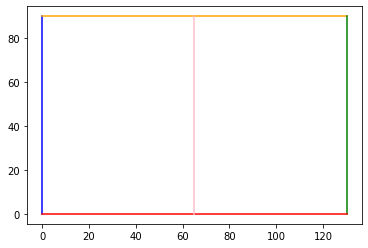

In [2]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,90], color="blue")
plt.plot([0,130],[90,90], color="orange")
plt.plot([130,130],[90,0], color="green")
plt.plot([130,0],[0,0], color="red")
plt.plot([65,65],[0,90], color="pink")

## Dibujando los circulos centrales

Vamos ahora a dibujar las líneas externas todas en negro, pero vamos a crear el punto central y el círculo alrededor

In [3]:
help(plt.Circle)

Help on class Circle in module matplotlib.patches:

class Circle(Ellipse)
 |  Circle(xy, radius=5, **kwargs)
 |  
 |  A circle patch.
 |  
 |  Method resolution order:
 |      Circle
 |      Ellipse
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, radius=5, **kwargs)
 |      Create a true circle at center *xy* = (*x*, *y*) with given *radius*.
 |      
 |      Unlike `CirclePolygon` which is a polygonal approximation, this uses
 |      Bezier splines and is much closer to a scale-free circle.
 |      
 |      Valid keyword arguments are:
 |      
 |      Properties:
 |          agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
 |          alpha: unknown
 |          animated: bool
 |          antialiased or aa: bool or None
 |          capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
 |          clip_box: `.Bbox`
 |          clip_on: bo

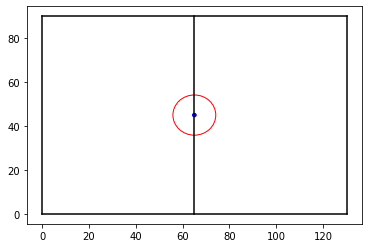

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Assign circles to variables - do not fill the centre circle!
centreCircle = plt.Circle((65,45),9.15,color="red",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="blue")

#Draw the circles to our plot
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)

### Dibujando el área

En el siguiente paso vamos a dibujar un área completa, es decir el área de penalty, el área del portero y su arco.

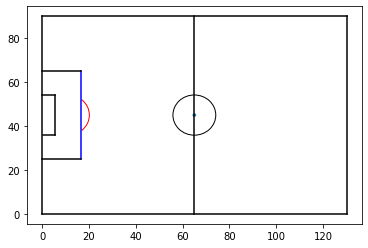

In [8]:
#Create figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="blue")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")


#Centre Circle/Spot
centreCircle = plt.Circle((65,45),9.15,fill=False)
centreSpot = plt.Circle((65,45),0.8)
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)

#Create Arc and add it to our plot
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="red")

ax.add_patch(leftArc)

In [9]:
help(Arc)

Help on class Arc in module matplotlib.patches:

class Arc(Ellipse)
 |  Arc(xy, width, height, angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
 |  
 |  An elliptical arc, i.e. a segment of an ellipse.
 |  
 |  Due to internal optimizations, there are certain restrictions on using Arc:
 |  
 |  - The arc cannot be filled.
 |  
 |  - The arc must be used in an `~.axes.Axes` instance. It can not be added
 |    directly to a `.Figure` because it is optimized to only render the
 |    segments that are inside the axes bounding box with high resolution.
 |  
 |  Method resolution order:
 |      Arc
 |      Ellipse
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, width, height, angle=0.0, theta1=0.0, theta2=360.0, **kwargs)
 |      Parameters
 |      ----------
 |      xy : (float, float)
 |          The center of the ellipse.
 |      
 |      width : float
 |          The length of the horizontal axis.
 |      
 |

## Creando una función

Como este dibujo puede que sea parte fundamental de nuestro trabajo, puede ser muy interesante meterlo todo en una función de python. En python las funciones nos van a permitir llamar de una manera sencilla a una buena cantidad de operaciones.

In [10]:
def CreatePitch():
    
    #Create figure
    fig=plt.figure(figsize=(8,5))
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')

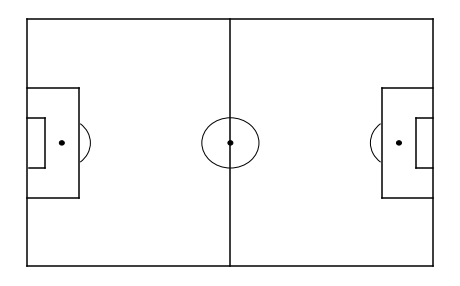

In [11]:
CreatePitch()

## Pruebas para un campo de Basket

Esta vez en lugar de pintar líneas vamos a dibujar un rectánculo, así que importaremos de **patches** circulos, rectángulos y arcos. 

In [12]:
from matplotlib.patches import Circle, Rectangle, Arc

In [13]:
color='black'
lw=2

In [14]:
help(Rectangle)

Help on class Rectangle in module matplotlib.patches:

class Rectangle(Patch)
 |  Rectangle(xy, width, height, angle=0.0, **kwargs)
 |  
 |  A rectangle defined via an anchor point *xy* and its *width* and *height*.
 |  
 |  The rectangle extends from ``xy[0]`` to ``xy[0] + width`` in x-direction
 |  and from ``xy[1]`` to ``xy[1] + height`` in y-direction. ::
 |  
 |    :                +------------------+
 |    :                |                  |
 |    :              height               |
 |    :                |                  |
 |    :               (xy)---- width -----+
 |  
 |  One may picture *xy* as the bottom left corner, but which corner *xy* is
 |  actually depends on the direction of the axis and the sign of *width*
 |  and *height*; e.g. *xy* would be the bottom right corner if the x-axis
 |  was inverted or if *width* was negative.
 |  
 |  Method resolution order:
 |      Rectangle
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Metho

(-100.0, 500.0)

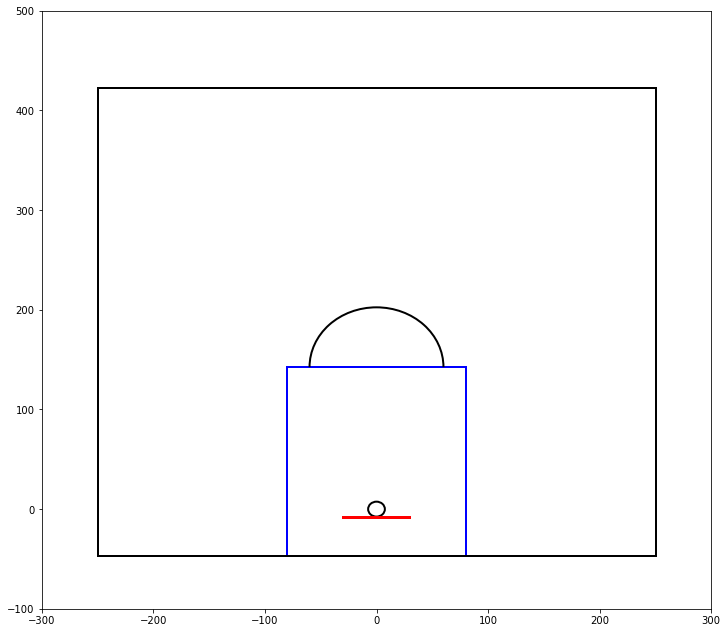

In [16]:
fig=plt.figure(figsize=(12,11))
ax=fig.add_subplot(1,1,1)
# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color='blue', fill=False)
outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
# Create backboard
backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color='red')

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)



ax.add_patch(outer_box)
ax.add_patch(outer_lines)
ax.add_patch(hoop)
ax.add_patch(backboard)
ax.add_patch(top_free_throw)
plt.xlim(-300,300)
plt.ylim(-100,500)

In [18]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

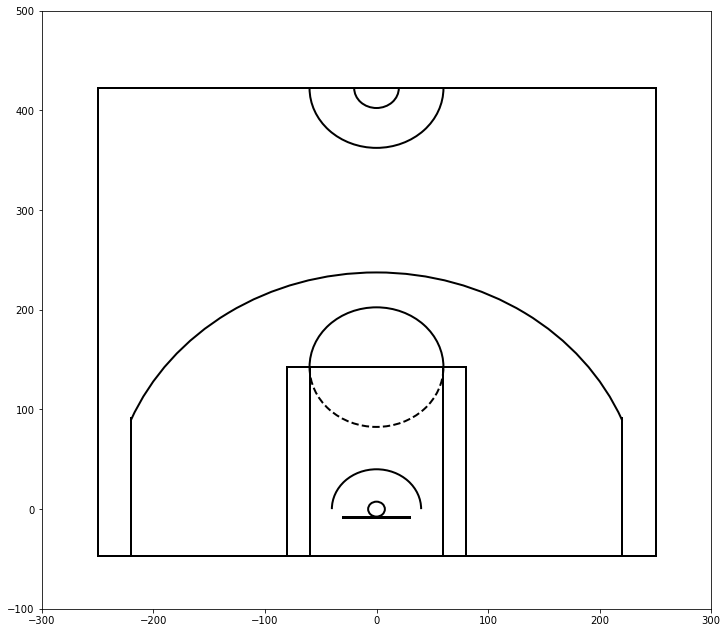

In [21]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

## Dibujando el campo de bádminton

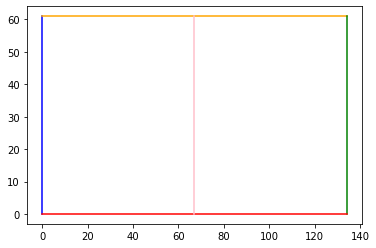

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,61], color="blue")
plt.plot([0,134],[61,61], color="orange")
plt.plot([134,134],[61,0], color="green")
plt.plot([134,0],[0,0], color="red")
plt.plot([67,67],[0,61], color="pink")

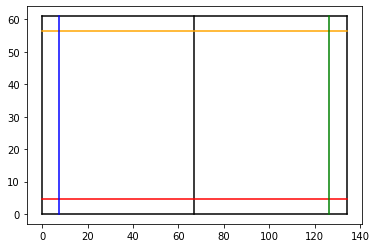

In [23]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,61], color="black")
plt.plot([0,134],[61,61], color="black")
plt.plot([134,134],[61,0], color="black")
plt.plot([134,0],[0,0], color="black")
plt.plot([67,67],[0,61], color="black")

plt.plot([0,134],[4.6,4.6], color="red")
plt.plot([0,134],[56.4,56.4], color="orange")
plt.plot([126.4,126.4],[61,0], color="green")
plt.plot([7.6,7.6],[0,61], color="blue")

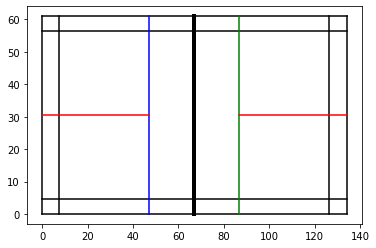

In [24]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,61], color="black")
plt.plot([0,134],[61,61], color="black")
plt.plot([134,134],[61,0], color="black")
plt.plot([134,0],[0,0], color="black")
plt.plot([67,67],[0,61], color="black", linewidth=4)

plt.plot([0,134],[4.6,4.6], color="black")
plt.plot([0,134],[56.4,56.4], color="black")
plt.plot([126.4,126.4],[61,0], color="black")
plt.plot([7.6,7.6],[0,61], color="black")

plt.plot([86.8,86.8],[61,0], color="green")
plt.plot([47.2,47.2],[0,61], color="blue")

plt.plot([47.2,0],[30.5,30.5], color="red")
plt.plot([86.8,134],[30.5,30.5], color="red")

(-6.7, 140.7, -3.0500000000000003, 64.05)

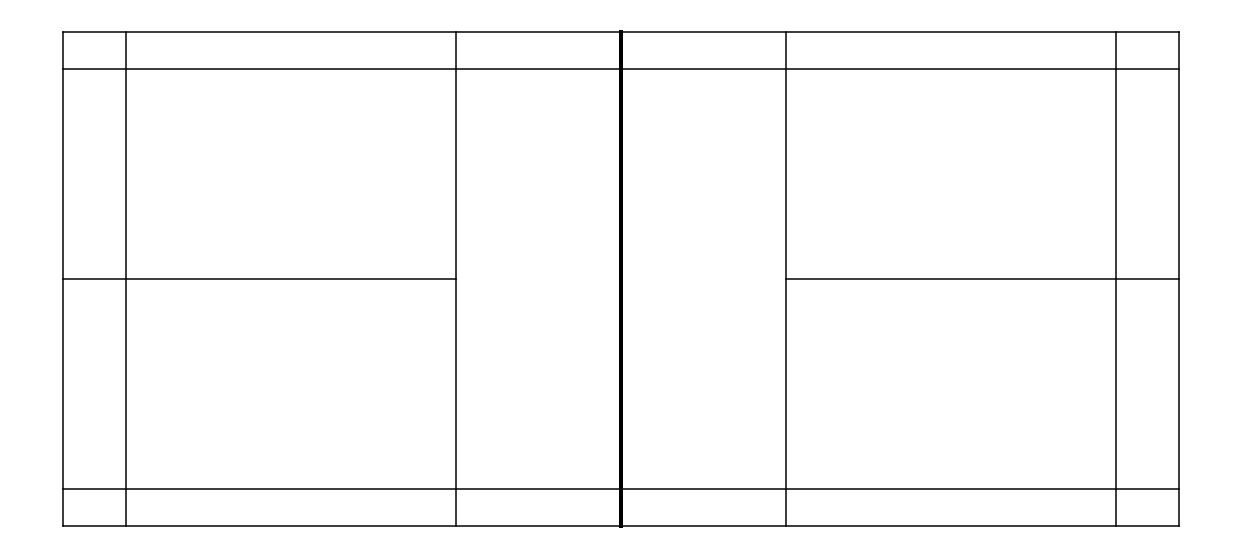

In [25]:
fig=plt.figure(figsize=(22,10))
ax=fig.add_subplot(1,1,1)

plt.plot([0,0],[0,61], color="black")
plt.plot([0,134],[61,61], color="black")
plt.plot([134,134],[61,0], color="black")
plt.plot([134,0],[0,0], color="black")
plt.plot([67,67],[0,61], color="black", linewidth=4)

plt.plot([0,134],[4.6,4.6], color="black")
plt.plot([0,134],[56.4,56.4], color="black")
plt.plot([126.4,126.4],[61,0], color="black")
plt.plot([7.6,7.6],[0,61], color="black")

plt.plot([86.8,86.8],[61,0], color="black")
plt.plot([47.2,47.2],[0,61], color="black")

plt.plot([47.2,0],[30.5,30.5], color="black")
plt.plot([86.8,134],[30.5,30.5], color="black")
plt.axis('off')

In [26]:
def bad_court(size=(22,10),color='black'):
    fig=plt.figure(figsize=size)
    ax=fig.add_subplot(1,1,1)

    plt.plot([0,0],[0,61], color=color)
    plt.plot([0,134],[61,61], color=color)
    plt.plot([134,134],[61,0], color=color)
    plt.plot([134,0],[0,0], color=color)
    plt.plot([67,67],[0,61], color=color, linewidth=4)

    plt.plot([0,134],[4.6,4.6], color=color)
    plt.plot([0,134],[56.4,56.4], color=color)
    plt.plot([126.4,126.4],[61,0], color=color)
    plt.plot([7.6,7.6],[0,61], color=color)

    plt.plot([86.8,86.8],[61,0], color=color)
    plt.plot([47.2,47.2],[0,61], color=color)

    plt.plot([47.2,0],[30.5,30.5], color=color)
    plt.plot([86.8,134],[30.5,30.5], color=color)
    plt.axis('off')
    

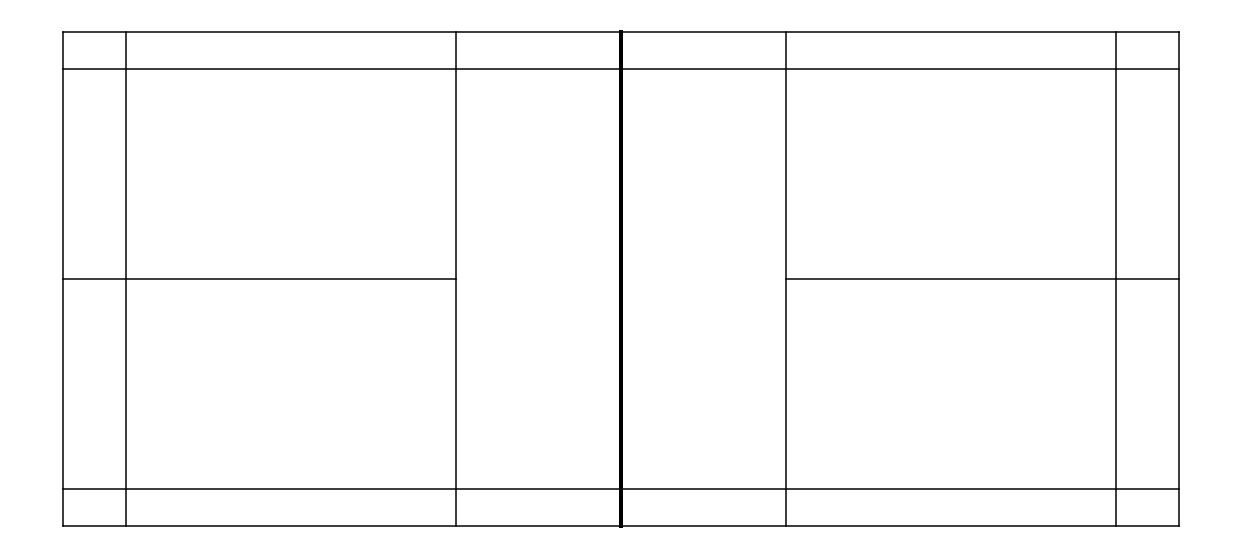

In [27]:
bad_court()